In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

from scipy.optimize import fmin_bfgs
from scipy.optimize import fmin

from scipy.io import loadmat #To Read .mat files
import matplotlib.image as mpimg 

from sklearn import svm
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import k_means
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

from collections import Counter

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0,6.0)
print("Setup Complete")

Setup Complete


# Implement K-mean algorithm

(300, 2)


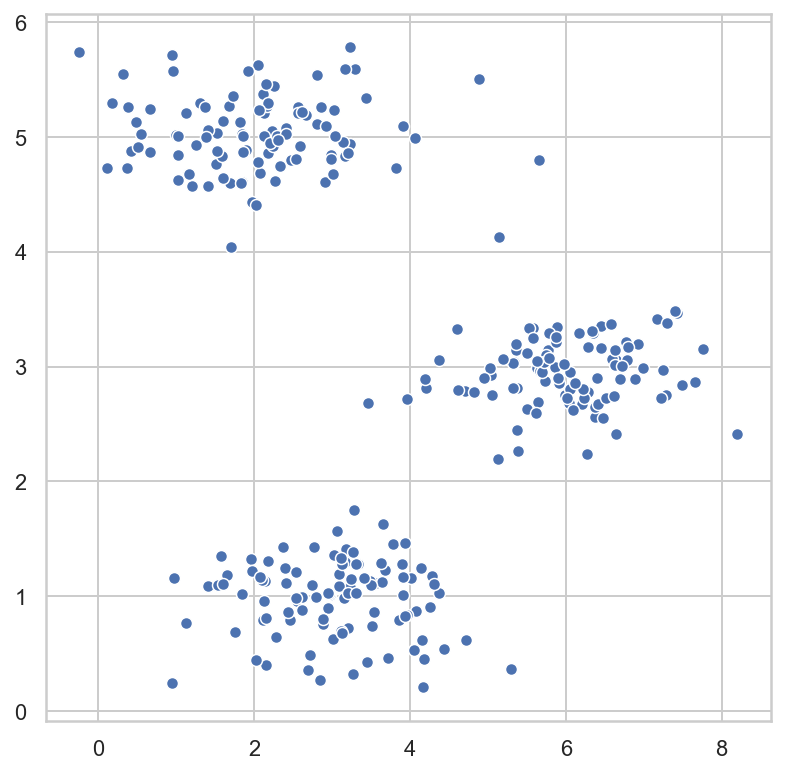

In [47]:
X = loadmat('data/ex7data2.mat')['X']
print(X.shape)
K = 3; # 3 Centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.set(style='whitegrid')
sns.scatterplot(x=X[:,0],y=X[:,1])

In [221]:
def findClosetCentroids(x,centroids):
    idx = np.zeros([len(x),1]) #index of each x.
    for i in range(len(x)):
        c = []
        for j in range(0,len(centroids)):
            c.append((np.linalg.norm(x[i]-centroids[j]))**2)
        idx[i,0]= c.index(min(c))
    return idx

def computeCentroids(x,idx,K):
    mu = []
    for i in range(0,K):
        x_i = x[np.nonzero(idx==i)[0]]
        #print(len(x_i))
        mu.append(1/len(x_i)*np.sum(x_i,0)) #sum over all rows, not columns.
    return mu

def runKmeans(x,init_centroids,max_iters):
    K = len(init_centroids)
    centroids = init_centroids
    for i in range(0,max_iters):
        idx = findClosetCentroids(x,centroids)
        centroids = computeCentroids(x,idx,K)
    idx = findClosetCentroids(x,centroids)
    return idx,centroids

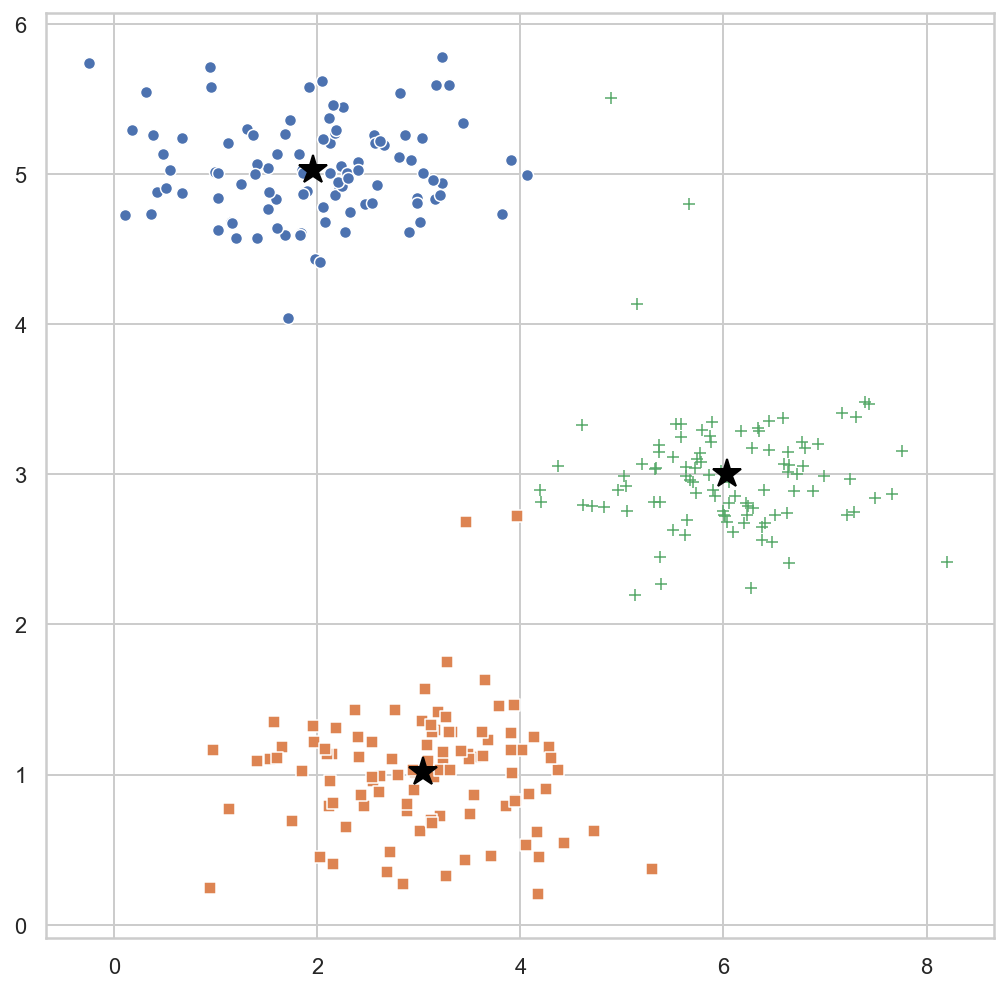

In [147]:
max_iters = 10
idx_X,centroids = runKmeans(X,initial_centroids,max_iters)

f, ax = plt.subplots(figsize=(8.5, 8.5))
markers = ["o",'s','+']
for i in range(0,3):
    x_ = X[np.nonzero(idx_X==i)[0]]
    sns.scatterplot(x=x_[:,0],y=x_[:,1],ax=ax,marker=markers[i])
    ax.plot(centroids[i][0],centroids[i][1],'*',color='black',markersize=15)

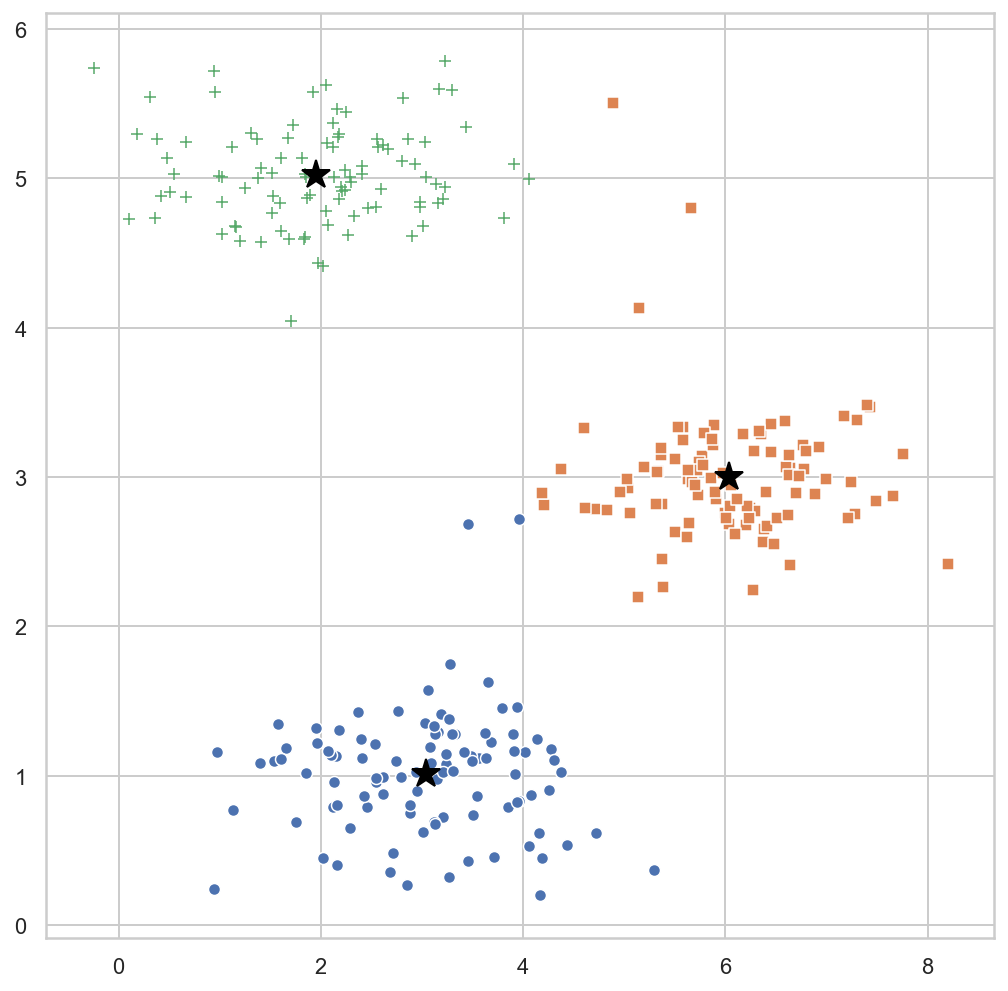

In [145]:
#Random initialization by picking a random training example.
randidx = np.random.choice(X.shape[0],3)
rand_centroids=[]
for j in randidx:
    rand_centroids.append(X[j,:])
    
idx_X,centroids = runKmeans(X,rand_centroids,max_iters)

f, ax = plt.subplots(figsize=(8.5, 8.5))
markers = ["o",'s','+']
for i in range(0,3):
    x_ = X[np.nonzero(idx_X==i)[0]]
    sns.scatterplot(x=x_[:,0],y=x_[:,1],ax=ax,marker=markers[i])
    ax.plot(centroids[i][0],centroids[i][1],'*',color='black',markersize=15)

## Image Compression with K-means

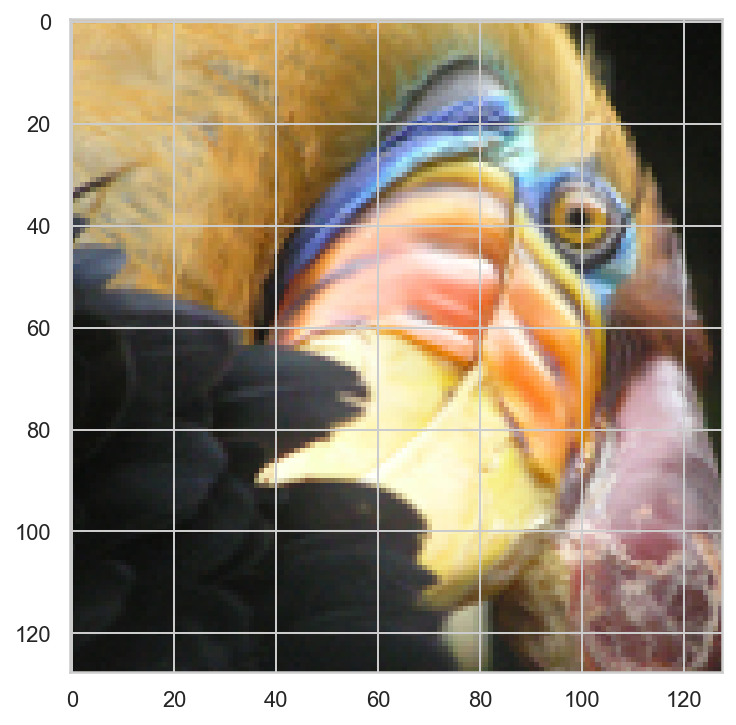

In [392]:
A = mpimg.imread('data/bird_small.png')
plt.imshow(A)

In [491]:
A2 = (A/255).reshape(128*128,3)
print(A2)
randidx = np.random.choice(A2.shape[0],16)
rand_centroids=[]
for j in randidx:
    rand_centroids.append(A2[j])
    #print(rand_centroids)
idx_X,centroids = runKmeans(A2,rand_centroids,10)
print(centroids[0])

[[0.00336794 0.00276817 0.00158401]
 [0.0035371  0.00284506 0.00178393]
 [0.00347559 0.00286044 0.00169166]
 ...
 [0.00099962 0.00066128 0.00059977]
 [0.00089196 0.00056901 0.00058439]
 [0.00079969 0.00059977 0.00052288]]
[0.00206366 0.00153556 0.00089774]


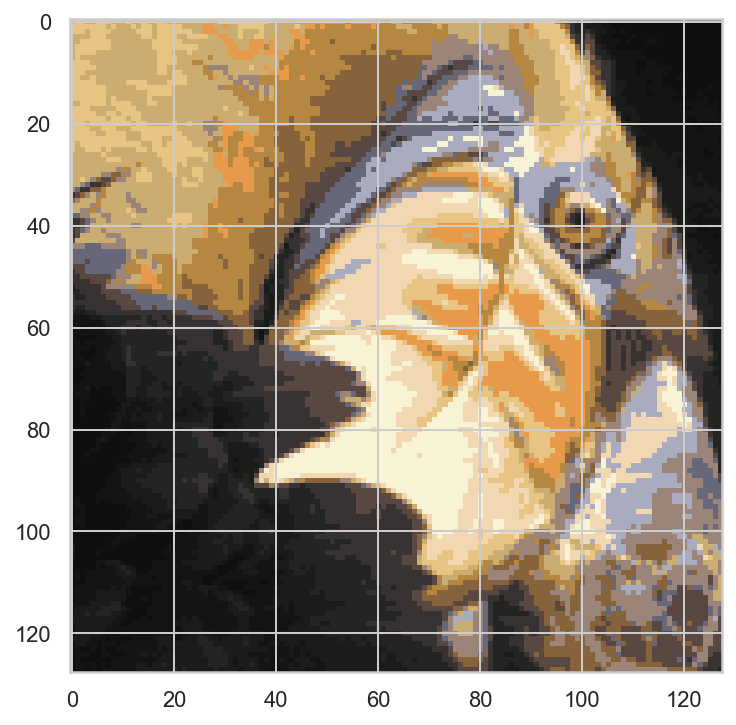

In [492]:
new_image = A2
for i in range(0,16):
    new_image[(idx_X==i).ravel(),:] = centroids[i]*255 ##Replace all pixel colors with one of the 16 colors.
plt.imshow(new_image.reshape(128,128,3))

# PCA 

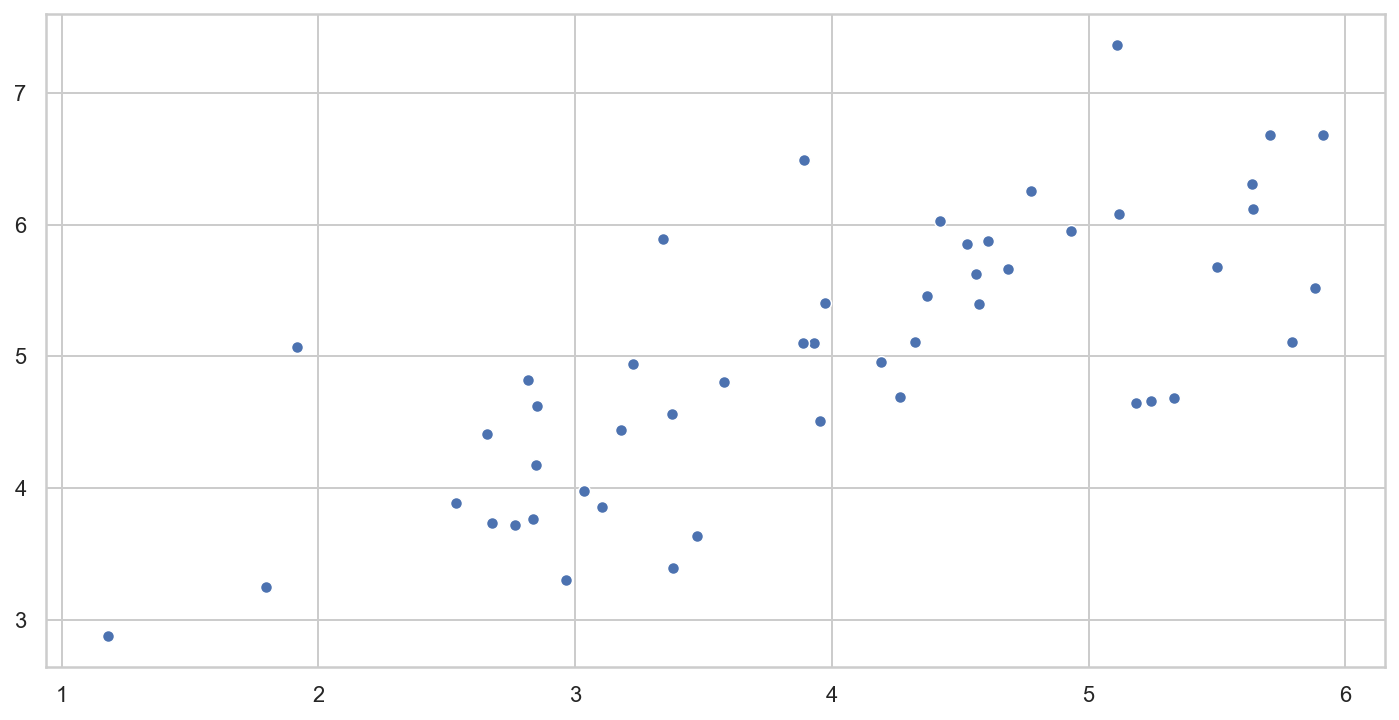

In [450]:
data = loadmat('data/ex7data1.mat')["X"]
sns.scatterplot(x=data[:,0],y=data[:,1])

Ratio of variance explained by component: [0.87062385 0.12937615]
Variance explained by component: [2.10987818 0.3135314 ]
Principal axes in feature space: [[-0.76908153 -0.63915068]
 [-0.63915068  0.76908153]]
Empirical mean per feature: [3.98926528 5.00280585]


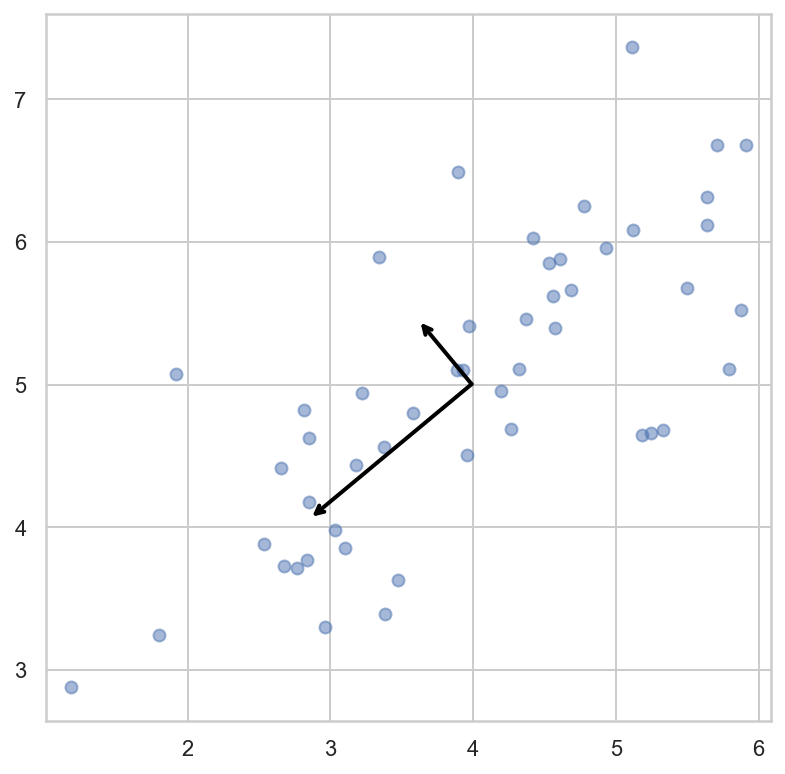

In [484]:
pca = PCA(n_components=2)
pca.fit(data)
print("Ratio of variance explained by component: " + str(pca.explained_variance_ratio_))
print("Variance explained by component: " + str(pca.explained_variance_))
print("Principal axes in feature space: " + str(pca.components_))
print("Empirical mean per feature: "+ str(pca.mean_))


def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color="black")
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
fig,ax = plt.subplots(figsize=(6.5,6.5))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [486]:
pca = PCA(n_components=1)
pca.fit(data)
Z = pca.fit_transform(data)
print(Z.shape) # Compressed to 1D.

(50, 1)


In [21]:
faces = loadmat("data/ex7faces.mat")['X']
faces_norm = normalize(faces)
pca = PCA()
pca.fit(faces_norm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## This part of the exercise has a lot of pre-coded scripts decoding the data. Not going to proceed